In [83]:
# Importing required libraries 

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score
import pandas as pd 
import numpy as np 
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [194]:
shelter_df = pd.read_csv('train.csv')

print(shelter_df.head())
print(shelter_df.shape)

  AnimalID     Name             DateTime      OutcomeType OutcomeSubtype  \
0  A671945  Hambone  2014-02-12 18:22:00  Return_to_owner            NaN   
1  A656520    Emily  2013-10-13 12:44:00       Euthanasia      Suffering   
2  A686464   Pearce  2015-01-31 12:28:00         Adoption         Foster   
3  A683430      NaN  2014-07-11 19:09:00         Transfer        Partner   
4  A667013      NaN  2013-11-15 12:52:00         Transfer        Partner   

  AnimalType SexuponOutcome AgeuponOutcome                        Breed  \
0        Dog  Neutered Male         1 year        Shetland Sheepdog Mix   
1        Cat  Spayed Female         1 year       Domestic Shorthair Mix   
2        Dog  Neutered Male        2 years                 Pit Bull Mix   
3        Cat    Intact Male        3 weeks       Domestic Shorthair Mix   
4        Dog  Neutered Male        2 years  Lhasa Apso/Miniature Poodle   

         Color  
0  Brown/White  
1  Cream Tabby  
2   Blue/White  
3   Blue Cream  
4      

#### dropna drops row count from 26.7k to about 7k

In [195]:
shelter_df.dropna(inplace = True)
print(shelter_df.head())
print(shelter_df.shape)

   AnimalID    Name             DateTime OutcomeType OutcomeSubtype  \
1   A656520   Emily  2013-10-13 12:44:00  Euthanasia      Suffering   
2   A686464  Pearce  2015-01-31 12:28:00    Adoption         Foster   
5   A677334    Elsa  2014-04-25 13:04:00    Transfer        Partner   
6   A699218   Jimmy  2015-03-28 13:11:00    Transfer        Partner   
12  A684601  Rocket  2016-02-03 11:27:00    Adoption         Foster   

   AnimalType SexuponOutcome AgeuponOutcome  \
1         Cat  Spayed Female         1 year   
2         Dog  Neutered Male        2 years   
5         Dog  Intact Female        1 month   
6         Cat    Intact Male        3 weeks   
12        Dog  Neutered Male        4 years   

                                Breed        Color  
1              Domestic Shorthair Mix  Cream Tabby  
2                        Pit Bull Mix   Blue/White  
5   Cairn Terrier/Chihuahua Shorthair    Black/Tan  
6              Domestic Shorthair Mix   Blue Tabby  
12                       

#### counting na values now

In [196]:
shelter_df.isnull().sum()

AnimalID          0
Name              0
DateTime          0
OutcomeType       0
OutcomeSubtype    0
AnimalType        0
SexuponOutcome    0
AgeuponOutcome    0
Breed             0
Color             0
dtype: int64

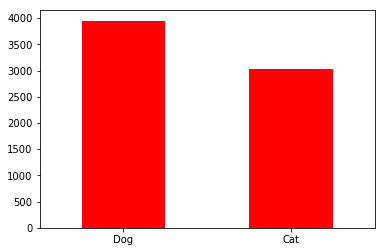

In [197]:
%matplotlib inline

animalcount = shelter_df['AnimalType'].value_counts() 
animalcount.plot(kind='bar',color='#FF0000',rot=0)

In [198]:
shelter_df.drop(['AnimalID'], axis = 1, inplace = True)
shelter_df.drop(['OutcomeSubtype'], axis = 1, inplace = True)
#shelter_df = shelter_df.drop('OutcomeSubtype', axis=1, inplace=True)


features = list(shelter_df.loc[:, shelter_df.columns != 'OutcomeType'])
#features = list(shelter_df)
features

['Name',
 'DateTime',
 'AnimalType',
 'SexuponOutcome',
 'AgeuponOutcome',
 'Breed',
 'Color']

In [199]:
shelter_df

,Name,DateTime,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
1,Emily,2013-10-13 12:44:00,Euthanasia,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,Pearce,2015-01-31 12:28:00,Adoption,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
5,Elsa,2014-04-25 13:04:00,Transfer,Dog,Intact Female,1 month,Cairn Terrier/Chihuahua Shorthair,Black/Tan
6,Jimmy,2015-03-28 13:11:00,Transfer,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Tabby
12,Rocket,2016-02-03 11:27:00,Adoption,Dog,Neutered Male,4 years,Pit Bull Mix,Brown
15,Oliver,2014-07-12 12:10:00,Adoption,Cat,Neutered Male,3 months,Domestic Shorthair Mix,Orange Tabby/White
18,Chrissy,2014-05-17 11:32:00,Transfer,Cat,Intact Female,2 years,Angora Mix,White
20,Anders,2014-01-19 15:03:00,Transfer,Dog,Intact Male,2 months,Queensland Heeler Mix,Black/White
21,Munchkin,2015-09-18 15:19:00,Transfer,Cat,Spayed Female,1 year,Domestic Shorthair Mix,White
25,Olive,2015-10-03 15:44:00,Transfer,Cat,Intact Female,1 month,Domestic Shorthair Mix,Orange Tabby


In [200]:
label = ['OutcomeType']
shelter_df['OutcomeType']

1        Euthanasia
2          Adoption
5          Transfer
6          Transfer
12         Adoption
15         Adoption
18         Transfer
20         Transfer
21         Transfer
25         Transfer
31         Transfer
34         Transfer
38         Transfer
42         Transfer
60         Transfer
61       Euthanasia
62         Transfer
66         Transfer
67         Transfer
71         Transfer
75         Transfer
80         Adoption
82         Transfer
84       Euthanasia
86         Adoption
92         Transfer
93       Euthanasia
94         Adoption
96         Transfer
101        Transfer
            ...    
26615    Euthanasia
26616      Transfer
26628    Euthanasia
26629    Euthanasia
26632      Transfer
26633    Euthanasia
26638      Transfer
26639      Adoption
26648      Adoption
26652      Transfer
26656      Adoption
26657      Transfer
26668    Euthanasia
26670      Transfer
26677      Transfer
26685      Transfer
26688      Transfer
26690      Transfer
26692      Transfer


In [201]:
print(shelter_df.isnull().sum())

Name              0
DateTime          0
OutcomeType       0
AnimalType        0
SexuponOutcome    0
AgeuponOutcome    0
Breed             0
Color             0
dtype: int64


In [202]:
# Giving numerical values to our label
def categorical_to_numeric(x):
    if x == 'Return_to_owner':
        return 0
    elif x == 'Euthanasia':
        return 1
    elif x == 'Adoption':
        return 2
    elif x == 'Transfer':
        return 3
    
shelter_df['OutcomeType'] = shelter_df['OutcomeType'].apply(categorical_to_numeric).astype(np.float32)
shelter_df

,Name,DateTime,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
1,Emily,2013-10-13 12:44:00,1.0,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,Pearce,2015-01-31 12:28:00,2.0,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
5,Elsa,2014-04-25 13:04:00,3.0,Dog,Intact Female,1 month,Cairn Terrier/Chihuahua Shorthair,Black/Tan
6,Jimmy,2015-03-28 13:11:00,3.0,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Tabby
12,Rocket,2016-02-03 11:27:00,2.0,Dog,Neutered Male,4 years,Pit Bull Mix,Brown
15,Oliver,2014-07-12 12:10:00,2.0,Cat,Neutered Male,3 months,Domestic Shorthair Mix,Orange Tabby/White
18,Chrissy,2014-05-17 11:32:00,3.0,Cat,Intact Female,2 years,Angora Mix,White
20,Anders,2014-01-19 15:03:00,3.0,Dog,Intact Male,2 months,Queensland Heeler Mix,Black/White
21,Munchkin,2015-09-18 15:19:00,3.0,Cat,Spayed Female,1 year,Domestic Shorthair Mix,White
25,Olive,2015-10-03 15:44:00,3.0,Cat,Intact Female,1 month,Domestic Shorthair Mix,Orange Tabby


## turn age of animal in age by weeks

In [203]:
def change_year_month_to_weeks(x):
    count, parse_age = x.split(" ")
    if parse_age == 'month':
        return int(4)
    elif parse_age == 'months':
        return 4 * int(count)
    elif parse_age == 'year':
        return int(52)
    elif parse_age == 'years':
        return 52 * int(count)
    elif parse_age == 'week':
        return int(count)
    elif parse_age == 'weeks':
        return int(count)
    
shelter_df['AgeuponOutcome'] = shelter_df['AgeuponOutcome'].apply(change_year_month_to_weeks).astype(np.float32)

test_age = shelter_df['AgeuponOutcome']
test_age.head()

1      52.0
2     104.0
5       4.0
6       3.0
12    208.0
Name: AgeuponOutcome, dtype: float32

In [204]:
shelter_df

,Name,DateTime,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
1,Emily,2013-10-13 12:44:00,1.0,Cat,Spayed Female,52.0,Domestic Shorthair Mix,Cream Tabby
2,Pearce,2015-01-31 12:28:00,2.0,Dog,Neutered Male,104.0,Pit Bull Mix,Blue/White
5,Elsa,2014-04-25 13:04:00,3.0,Dog,Intact Female,4.0,Cairn Terrier/Chihuahua Shorthair,Black/Tan
6,Jimmy,2015-03-28 13:11:00,3.0,Cat,Intact Male,3.0,Domestic Shorthair Mix,Blue Tabby
12,Rocket,2016-02-03 11:27:00,2.0,Dog,Neutered Male,208.0,Pit Bull Mix,Brown
15,Oliver,2014-07-12 12:10:00,2.0,Cat,Neutered Male,12.0,Domestic Shorthair Mix,Orange Tabby/White
18,Chrissy,2014-05-17 11:32:00,3.0,Cat,Intact Female,104.0,Angora Mix,White
20,Anders,2014-01-19 15:03:00,3.0,Dog,Intact Male,8.0,Queensland Heeler Mix,Black/White
21,Munchkin,2015-09-18 15:19:00,3.0,Cat,Spayed Female,52.0,Domestic Shorthair Mix,White
25,Olive,2015-10-03 15:44:00,3.0,Cat,Intact Female,4.0,Domestic Shorthair Mix,Orange Tabby


In [205]:
shelter_df.drop(['DateTime'], axis = 1, inplace = True)
shelter_df.drop(['Name'], axis = 1, inplace = True)

shelter_df

,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
1,1.0,Cat,Spayed Female,52.0,Domestic Shorthair Mix,Cream Tabby
2,2.0,Dog,Neutered Male,104.0,Pit Bull Mix,Blue/White
5,3.0,Dog,Intact Female,4.0,Cairn Terrier/Chihuahua Shorthair,Black/Tan
6,3.0,Cat,Intact Male,3.0,Domestic Shorthair Mix,Blue Tabby
12,2.0,Dog,Neutered Male,208.0,Pit Bull Mix,Brown
15,2.0,Cat,Neutered Male,12.0,Domestic Shorthair Mix,Orange Tabby/White
18,3.0,Cat,Intact Female,104.0,Angora Mix,White
20,3.0,Dog,Intact Male,8.0,Queensland Heeler Mix,Black/White
21,3.0,Cat,Spayed Female,52.0,Domestic Shorthair Mix,White
25,3.0,Cat,Intact Female,4.0,Domestic Shorthair Mix,Orange Tabby


## get max age to normalize column

In [206]:
max_age = shelter_df['AgeuponOutcome'].max()
max_age

1040.0

## normalize ageuponoutcome

In [207]:
def normalize_age(x):
    return x/max_age
    
shelter_df['AgeuponOutcome'] = shelter_df['AgeuponOutcome'].apply(normalize_age).astype(np.float32)

test_age = shelter_df['AgeuponOutcome']
test_age.head()

1     0.050000
2     0.100000
5     0.003846
6     0.002885
12    0.200000
Name: AgeuponOutcome, dtype: float32

In [208]:
shelter_df

,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
1,1.0,Cat,Spayed Female,0.050000,Domestic Shorthair Mix,Cream Tabby
2,2.0,Dog,Neutered Male,0.100000,Pit Bull Mix,Blue/White
5,3.0,Dog,Intact Female,0.003846,Cairn Terrier/Chihuahua Shorthair,Black/Tan
6,3.0,Cat,Intact Male,0.002885,Domestic Shorthair Mix,Blue Tabby
12,2.0,Dog,Neutered Male,0.200000,Pit Bull Mix,Brown
15,2.0,Cat,Neutered Male,0.011538,Domestic Shorthair Mix,Orange Tabby/White
18,3.0,Cat,Intact Female,0.100000,Angora Mix,White
20,3.0,Dog,Intact Male,0.007692,Queensland Heeler Mix,Black/White
21,3.0,Cat,Spayed Female,0.050000,Domestic Shorthair Mix,White
25,3.0,Cat,Intact Female,0.003846,Domestic Shorthair Mix,Orange Tabby


In [209]:
list_nonNumerical = ['AnimalType','SexuponOutcome','Breed','Color']

for column in list_nonNumerical:
    dummies = pd.get_dummies(shelter_df[column])
    shelter_df[dummies.columns] = dummies
    
getnewFeatures_X = shelter_df

getnewFeatures_X.head()

,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Cat,Dog,Intact Female,Intact Male,...,White/Red,White/Red Tick,White/Tan,White/Tricolor,White/White,White/Yellow,Yellow,Yellow Brindle,Yellow Brindle/White,Yellow/White
1,1.0,Cat,Spayed Female,0.050000,Domestic Shorthair Mix,Cream Tabby,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,Dog,Neutered Male,0.100000,Pit Bull Mix,Blue/White,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,3.0,Dog,Intact Female,0.003846,Cairn Terrier/Chihuahua Shorthair,Black/Tan,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
6,3.0,Cat,Intact Male,0.002885,Domestic Shorthair Mix,Blue Tabby,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
12,2.0,Dog,Neutered Male,0.200000,Pit Bull Mix,Brown,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [213]:
y = shelter_df['OutcomeType']

print(y.head())
print(y.shape)
print(shelter_df.shape)

1     1.0
2     2.0
5     3.0
6     3.0
12    2.0
Name: OutcomeType, dtype: float32
(6979,)
(6979, 905)


In [214]:
print(y.isnull().sum())

70


In [215]:
print(shelter_df.isnull().sum())

OutcomeType                                        70
AnimalType                                          0
SexuponOutcome                                      0
AgeuponOutcome                                      9
Breed                                               0
Color                                               0
Cat                                                 0
Dog                                                 0
Intact Female                                       0
Intact Male                                         0
Neutered Male                                       0
Spayed Female                                       0
Unknown                                             0
Affenpinscher Mix                                   0
Airedale Terrier                                    0
Airedale Terrier Mix                                0
Airedale Terrier/Labrador Retriever                 0
Akita                                               0
Akita Mix                   

In [216]:
shelter_df.dropna(inplace = True)
print(shelter_df.isnull().sum())

OutcomeType                                        0
AnimalType                                         0
SexuponOutcome                                     0
AgeuponOutcome                                     0
Breed                                              0
Color                                              0
Cat                                                0
Dog                                                0
Intact Female                                      0
Intact Male                                        0
Neutered Male                                      0
Spayed Female                                      0
Unknown                                            0
Affenpinscher Mix                                  0
Airedale Terrier                                   0
Airedale Terrier Mix                               0
Airedale Terrier/Labrador Retriever                0
Akita                                              0
Akita Mix                                     

In [217]:
y = shelter_df['OutcomeType']

print(y.head())

1     1.0
2     2.0
5     3.0
6     3.0
12    2.0
Name: OutcomeType, dtype: float32


In [218]:
getnewFeatures_X.drop(['OutcomeType','AnimalType','SexuponOutcome','Breed','Color'], axis=1, inplace=True)

# getnewFeatures_X.shape

X = getnewFeatures_X

print(X.head())

    AgeuponOutcome  Cat  Dog  Intact Female  Intact Male  Neutered Male  \
1         0.050000    1    0              0            0              0   
2         0.100000    0    1              0            0              1   
5         0.003846    0    1              1            0              0   
6         0.002885    1    0              0            1              0   
12        0.200000    0    1              0            0              1   

    Spayed Female  Unknown  Affenpinscher Mix  Airedale Terrier      ...       \
1               1        0                  0                 0      ...        
2               0        0                  0                 0      ...        
5               0        0                  0                 0      ...        
6               0        0                  0                 0      ...        
12              0        0                  0                 0      ...        

    White/Red  White/Red Tick  White/Tan  White/Tricolor  Whit

In [219]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

print("X_Train size: " + str(X_train.shape))
print("y_train size: " + str(y_train.shape))
print("X_Test size: " + str(X_test.shape))
print("y_test size: " + str(y_test.shape))

X_Train size: (5522, 900)
y_train size: (5522,)
X_Test size: (1381, 900)
y_test size: (1381,)


In [220]:
print(X.isnull().sum())

AgeuponOutcome                                     0
Cat                                                0
Dog                                                0
Intact Female                                      0
Intact Male                                        0
Neutered Male                                      0
Spayed Female                                      0
Unknown                                            0
Affenpinscher Mix                                  0
Airedale Terrier                                   0
Airedale Terrier Mix                               0
Airedale Terrier/Labrador Retriever                0
Akita                                              0
Akita Mix                                          0
Akita/Labrador Retriever                           0
Akita/Pit Bull                                     0
Akita/Siberian Husky                               0
Alaskan Husky Mix                                  0
Alaskan Husky/Australian Shepherd             

## using random forest

In [221]:
print(y.isnull().sum())

0


In [226]:
ran_forest = RandomForestClassifier(n_estimators=19, bootstrap = True, random_state=2)

ran_forest.fit(X_train, y_train)
y_predict_ranforest = ran_forest.predict(X_test)

random_forest_accuracy = accuracy_score(y_test, y_predict_ranforest)

print(random_forest_accuracy)

0.70963070239


## using knn

In [227]:
knn_neighbors = KNeighborsClassifier(n_neighbors=3)
knn_neighbors.fit(X_train, y_train)
y_predict_knn = knn_neighbors.predict(X_test)

knn_accuracy = accuracy_score(y_test, y_predict_knn)

print(knn_accuracy)


0.652425778421


### using decision tree

In [229]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_predict_decision_tree = decision_tree.predict(X_test)

dt_accuracy = accuracy_score(y_test, y_predict_decision_tree)

print(dt_accuracy)

0.692976104272
